
# Clustering 실습1 - 2D 인공데이터

## 필요한 모듈을 불러오자

In [66]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import collections
import mglearn
import matplotlib.pyplot as plt
RANDOM_STATE = 1026 # For same results based on each algorithm
print ("Mudule load complete!")

Mudule load complete!


mglearn
#그래프나 데이터 적재와 관련한 세세한 코드를 일일이 쓰지 않아도 되게끔만든 유틸리티 함수집합
#pip install mglearn 설치 필요



\## 목적 : 3가지의 인공 데이터를 기반으로 Clustering을 이해해보자.
>### [A] 사용할 알고리듬 
>> 1. k-Means clustering
>> 2. Hierarchical clustering
 

>### [B] 사용할 인공 데이터
>> 1. WellSeparated
>> 2. Seperated
>> 3. Twomoon

In [68]:
### 먼저 모든 데이터에 대하여 standardization 한 후의 데이터의 구조를 살펴봄

In [69]:
def standardization(Data):
    Input = ((Data[['X', 'Y']] - np.mean(Data[['X', 'Y']], axis=0)) / np.std(Data[['X', 'Y']], axis=0))
    return(pd.concat([Input, Data['Class']], axis=1))
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)


In [70]:
WellSeparated = standardization(pd.read_csv('E:/Untitled Folder/wellseparated.csv'))
Twomoon = standardization(pd.read_csv('E:/Untitled Folder/Twomoon.csv'))
Seperated = standardization(pd.read_csv('E:/Untitled Folder/Seperated.csv'))

In [81]:
#3가지 데이터 Dictionary로 저장
Artificial_Dataset={'WellSeparated':WellSeparated,  'Twomoon': Twomoon,'Seperated':Seperated}

#column2에 존재하는 클래스 별 데이터 수 및 기본 데이터 정보 표현 함수 이용
def Data_Info(Data,NAME):
    print(NAME ,": ",np.shape(Data)[0],"/ Class : ",len(collections.Counter(np.array(Data)[:,2])))

    
print("각각의 2차원의 데이터 갯수는 아래와 같음")
for i in range(len(Artificial_Dataset)):
    Data_Info(Artificial_Dataset[list(Artificial_Dataset.keys())[i]],list(Artificial_Dataset.keys())[i])
    

각각의 2차원의 데이터 갯수는 아래와 같음
WellSeparated :  500 / Class :  5
Twomoon :  600 / Class :  2
Seperated :  600 / Class :  3


In [83]:
#2차원 plotting 보여주기
fig, axes = plt.subplots(1,3,figsize=(15,4))
for i in range(len(Artificial_Dataset)):
    Data=Artificial_Dataset[list(Artificial_Dataset.keys())[i]]
    mglearn.discrete_scatter(Data['X'], Data['Y'], Data['Class'], ax=axes[i], s=5)
    axes[i].set_title("Data:" + list(Artificial_Dataset.keys())[i])

# Algorithm1 : k-Means clustering
### 다시 한번 k-Means 클러스터링의 메커니즘을 위해 간단한 도식화를 확인하자

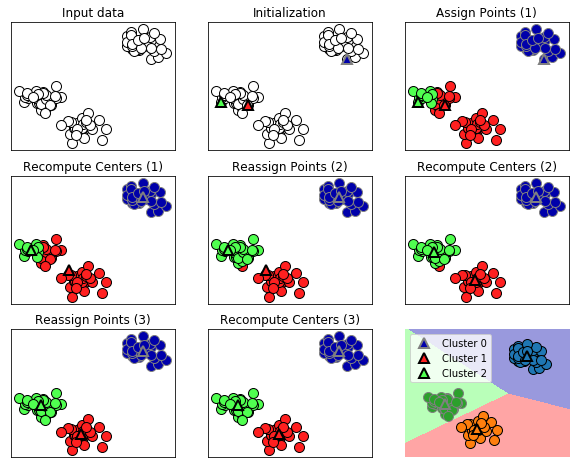

In [85]:
mglearn.plots.plot_kmeans_algorithm()

mglearn.plots.plot_kmeans_boundaries()

### k-Means Visualization을 위해 함수생성

In [89]:
#Kmeans_Clustering 적용 및 결과 2차원 plotting
def k_Means_Plot(Data,Select_k,NAME,Init_Method='k-means++',Num_Init=10):
    Data2 = Data[['X', 'Y']]    
    fig, axes = plt.subplots(1, (np.max(list(Select_k))-np.min(list(Select_k)))+1, figsize=(15, 4))
    
    #클러수터 수 (k)를 증가 + kmeans 피팅 및 클러스터 결과물(label, 중심)들 동시에 plotting 
    for i in Select_k:
        Kmeans_Clustering = KMeans(n_clusters=i,init=Init_Method,random_state=100,n_init=Num_Init)
        Kmeans_Clustering.fit(Data2)
        mglearn.discrete_scatter(Data2['X'], Data2['Y'], Kmeans_Clustering.labels_, ax=axes[i - 2], s=5)
        mglearn.discrete_scatter(Kmeans_Clustering.cluster_centers_[:, 0], Kmeans_Clustering.cluster_centers_[:, 1],
                                 list(range(i)), markeredgewidth=3, ax=axes[i - 2], s=10)
        Score=np.round(silhouette_score(Data2,Kmeans_Clustering.labels_),3)
        axes[i - 2].set_title( NAME + ' / k = ' + str(i)+' / S_Score:'+str(Score))

### Kmeans_Clustering = KMeans(n_clusters=i,init=Init_Method,random_state=100,n_init=Num_Init)
n_clusters:클러스터 수
Init_Method: 초기 중심값 정하는 방법
n_init: 반복횟수 (Number of time the k-means algorithm will be run with different centroid seeds. 
The final results will be the best output of n_init consecutive runs in terms of inertia.)

### silhouette_score(Data2,Kmeans_Clustering.labels_)
The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

## 해당 실습 목적
> 1. 초기값의 중요성
> 2. silhouette_score가 원형(구형)이 아닌 경우 성능이 좋지 않을 수 있다는것을 파악

### Initialization method = random, Num_init=1
> 횟수도 적고 random initalization을 하여 성능이 좋지 않음을 볼 수 있다.

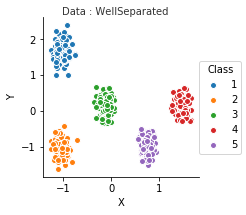

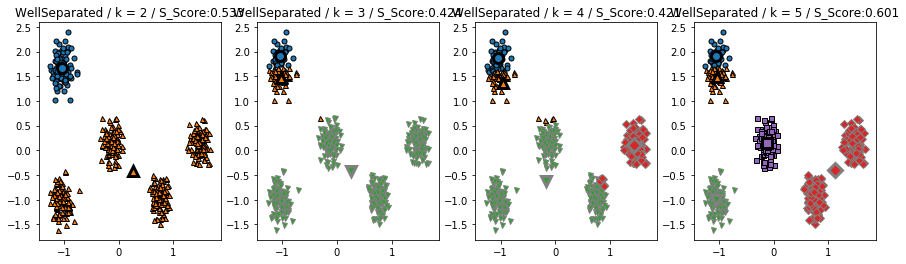

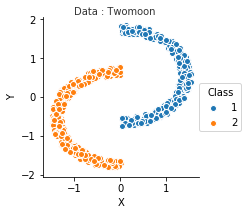

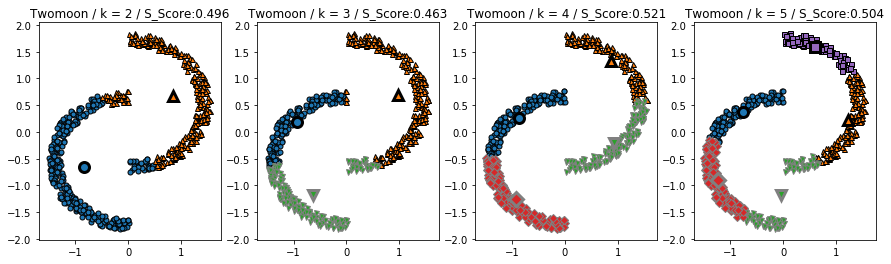

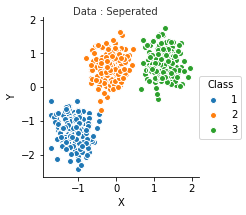

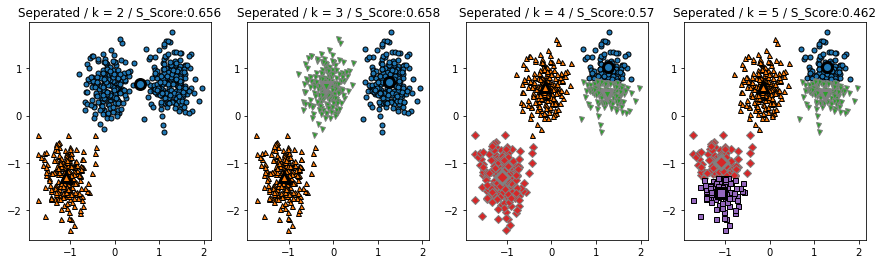

In [90]:
def Simple_Scatter(Data,Name):
    G=sns.pairplot(x_vars=['X'], y_vars=['Y'], data=Data, hue="Class", size=3)
    G.fig.suptitle("Data : "+Name, fontsize=10, color='black', alpha=0.8)
for i in range(0,3):
    Simple_Scatter(Artificial_Dataset[list(Artificial_Dataset.keys())[i]],list(Artificial_Dataset.keys())[i])

    k_Means_Plot(Data=Artificial_Dataset[list(Artificial_Dataset.keys())[i]] ,Select_k=range(2, 6),NAME=list(Artificial_Dataset.keys())[i],
                 Init_Method='random',Num_Init=1)    

### Initialization method = random, Num_init=5
> 횟수를 5로 늘렸지만 random initalization을 하여 성능이 좋지 않음을 볼 수 있다.

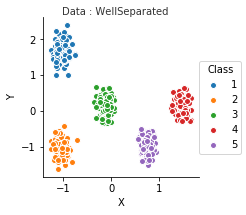

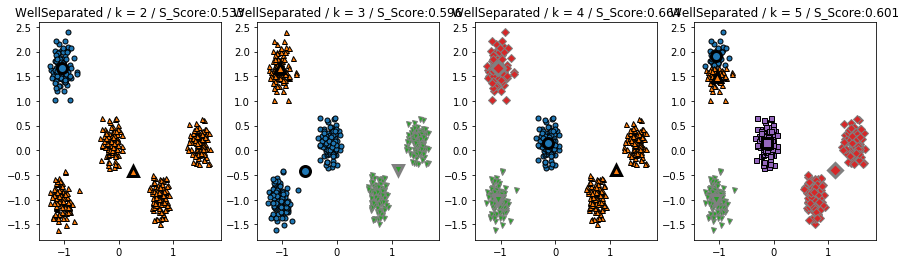

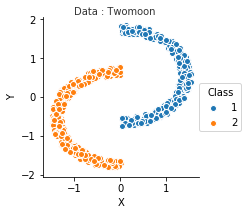

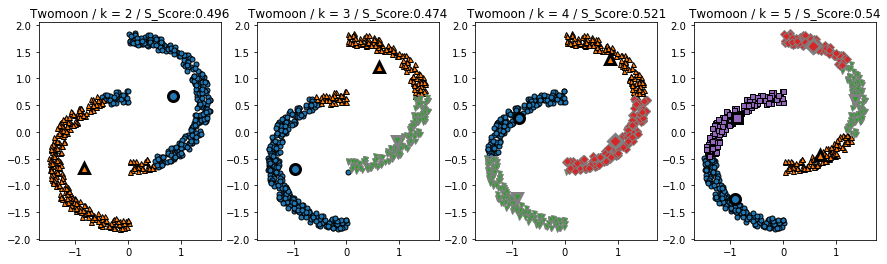

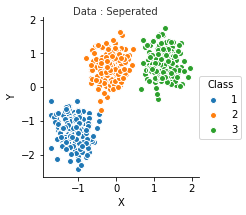

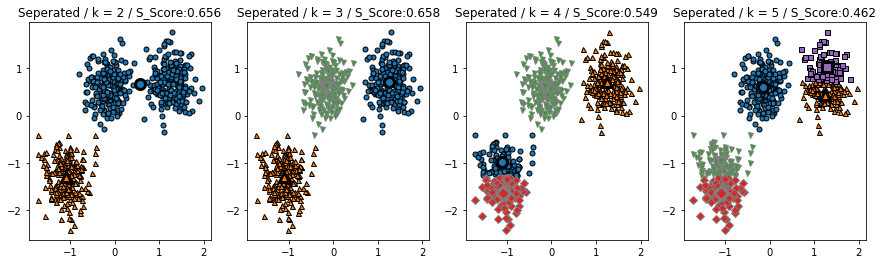

In [91]:
for i in range(0,3):
    Simple_Scatter(Artificial_Dataset[list(Artificial_Dataset.keys())[i]],list(Artificial_Dataset.keys())[i])
    k_Means_Plot(Data=Artificial_Dataset[list(Artificial_Dataset.keys())[i]] ,Select_k=range(2, 6),
                 NAME=list(Artificial_Dataset.keys())[i],Init_Method='random',Num_Init=5)    

### Initialization method = random, Num_init=10
> 횟수를 10로 늘린후의 결과는 random initalization을 하여도 wellseperated datset에서 잘 작동하는 것을 확인

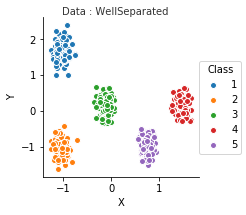

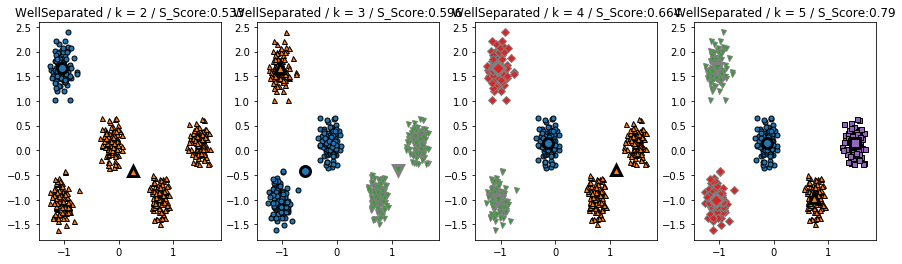

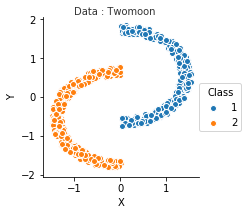

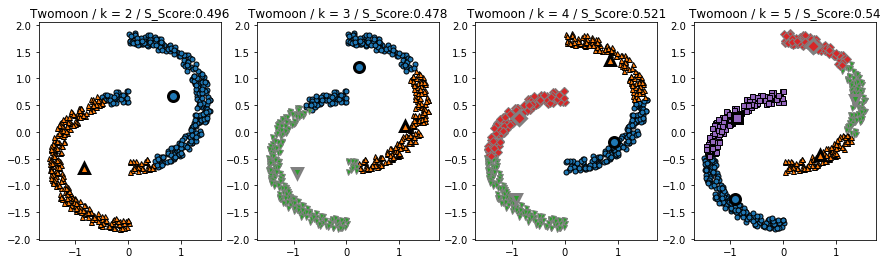

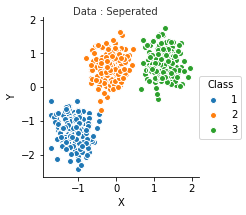

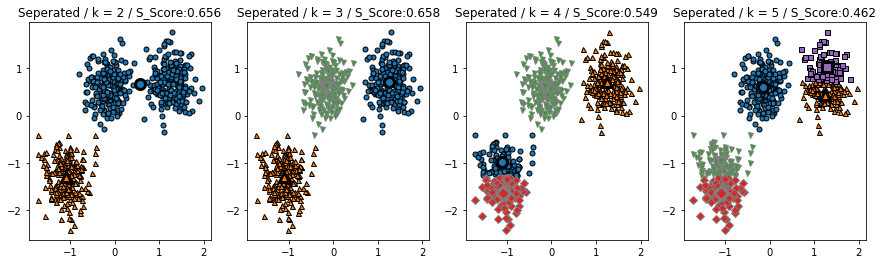

In [92]:
for i in range(0,3):
    Simple_Scatter(Artificial_Dataset[list(Artificial_Dataset.keys())[i]],list(Artificial_Dataset.keys())[i])
    k_Means_Plot(Data=Artificial_Dataset[list(Artificial_Dataset.keys())[i]] ,Select_k=range(2, 6),
                 NAME=list(Artificial_Dataset.keys())[i],Init_Method='random',Num_Init=10)    

### Initialization method = k-means++, Num_init=5
>>Arthur, David, and Sergei Vassilvitskii. "k-means++: The advantages of careful seeding." Proceedings of the eighteenth annual ACM-SIAM symposium on Discrete algorithms. Society for Industrial and Applied Mathematics, 2007.
http://dl.acm.org/citation.cfm?id=128338
![k-means++](dataset/kmeansplus.png)




### 횟수가 5번 이지만 random 대신에 k-Means++을 초기값으로 사용하는것이 상대적으로 우수함을 알 수 있음

### k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details. 

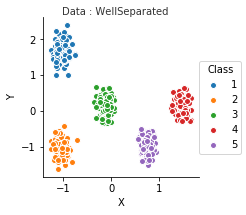

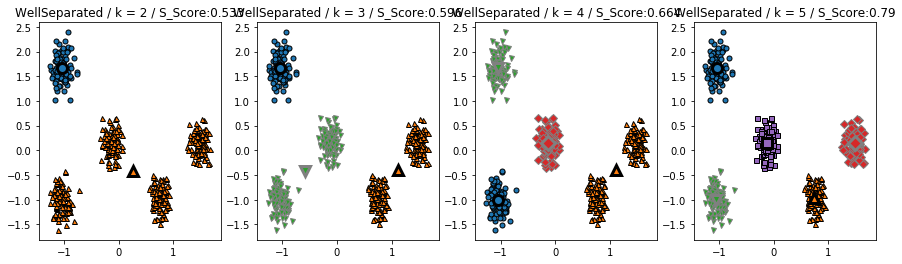

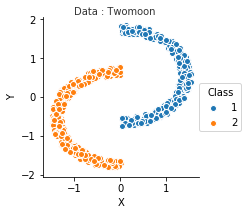

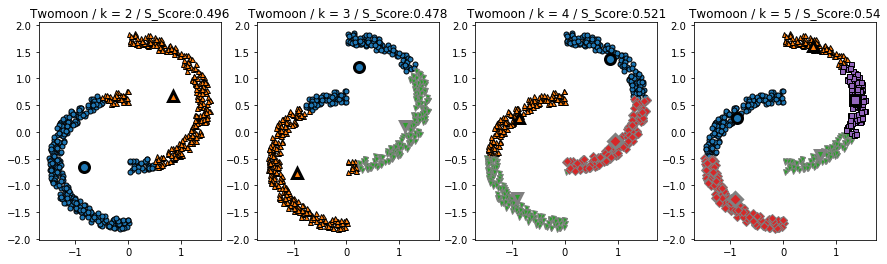

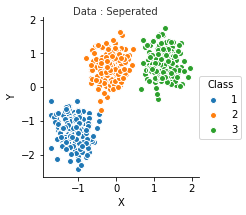

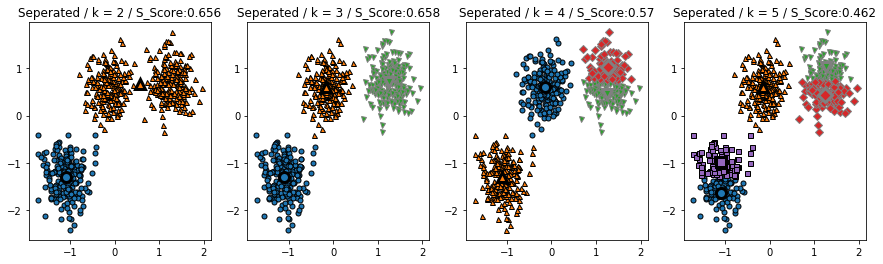

In [43]:
for i in range(0,3):
    Simple_Scatter(Artificial_Dataset[list(Artificial_Dataset.keys())[i]],list(Artificial_Dataset.keys())[i])
    k_Means_Plot(Data=Artificial_Dataset[list(Artificial_Dataset.keys())[i]] ,Select_k=range(2, 6),
                 NAME=list(Artificial_Dataset.keys())[i],Init_Method='k-means++',Num_Init=5)    

# Algorithm2 : Hierarchical clustering
### 다시 한번 Hierarchical clustering(agglomerative)의 메커니즘을 위해 간단한 도식화를 확인함

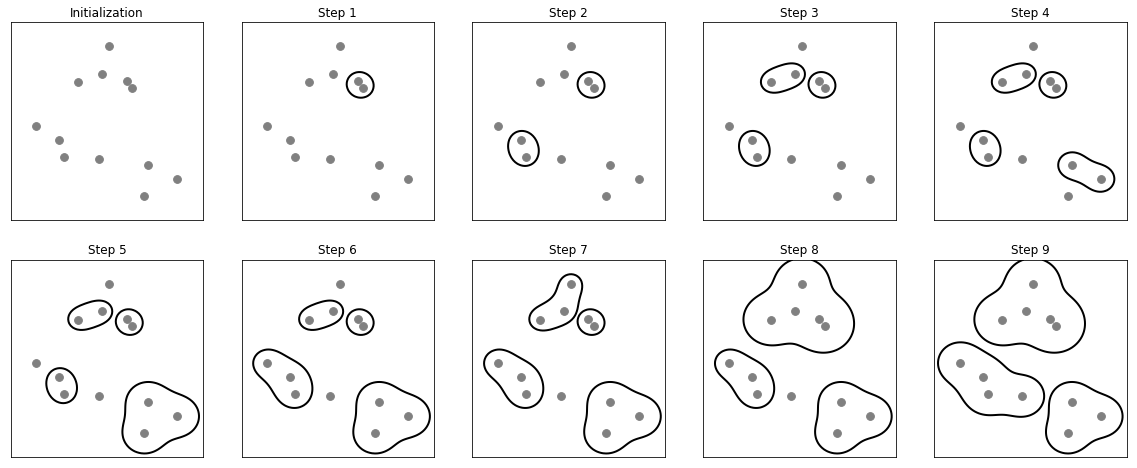

In [93]:
mglearn.plots.plot_agglomerative_algorithm()

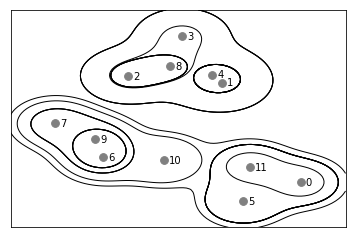

In [45]:
mglearn.plots.plot_agglomerative()

### WellSeparated dataset을 기준으로 complete linkage(maximum distance)를 이용하여 dendrogram을 시각화 

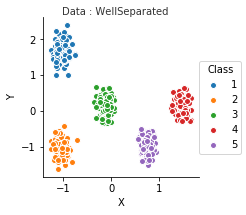

In [46]:
Simple_Scatter(Artificial_Dataset[list(Artificial_Dataset.keys())[0]],list(Artificial_Dataset.keys())[0])
def Fixed_Dendrogram(Data,Num_Viz_Leaf_Cluster,Full_Use):
    Linkage_Matrix = linkage(Data,'complete')
    if(Full_Use==True):
        Num_Viz_Leaf_Cluster=np.shape(Data)[0]
        plt.title('Hierarchical Clustering Dendrogram')
        plt.xlabel('sample index')
    else:
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
    plt.ylabel('distance')
    dendrogram(
        Linkage_Matrix,
        truncate_mode='lastp',  
        p=Num_Viz_Leaf_Cluster, 
        leaf_rotation=90.,
        leaf_font_size=12.,
        color_threshold='default'
    )
    plt.show()

###  linkage(Data,'complete')
'single':min
'complete':max

###  dendrogram(
        Linkage_Matrix,
        truncate_mode='lastp',#  
        p=Num_Viz_Leaf_Cluster, 
        leaf_rotation=90.,
        leaf_font_size=12.,
        color_threshold='default'
    ) 
    
truncate_mode: The dendrogram can be hard to read when the original observation matrix from which the linkage is derived is large. Truncation is used to condense the dendrogram. 

There are several modes:
'lastp':The last p non-singleton clusters formed in the linkage are the only non-leaf nodes in the linkage; they correspond to rows Z[n-p-2:end] in Z. All other non-singleton clusters are contracted into leaf nodes.

'level':
No more than p levels of the dendrogram tree are displayed. A “level” includes all nodes with p merges from the last merge.

### 전체 datapoint를 모두 dendrogram에 시각화

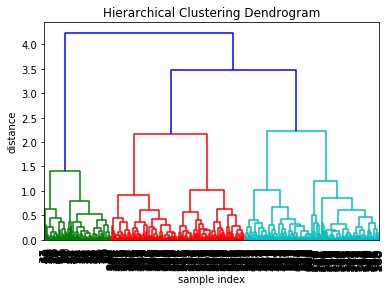

In [15]:
Fixed_Dendrogram(WellSeparated[['X','Y']],0,True)

In [97]:
range(500-30-2,500)

range(468, 500)

### 30개와 10개의 cluster를 dendrogram에 시각화

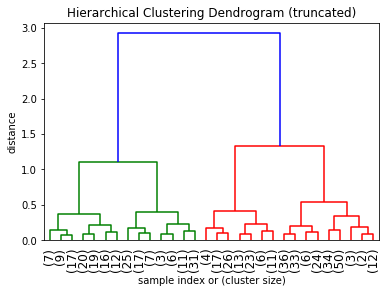

In [47]:
Fixed_Dendrogram(WellSeparated[['X']],30,False)

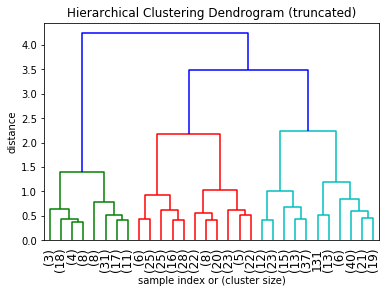

In [48]:
Fixed_Dendrogram(WellSeparated[['X','Y']],30,False)

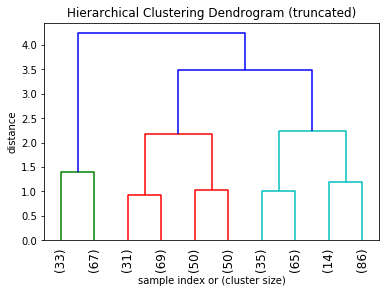

In [49]:
Fixed_Dendrogram(WellSeparated[['X','Y']],10,False)

In [101]:
def Hclust_Plot(Data,Select_k,NAME):
    Data2 = Data[['X', 'Y']]    
    fig, axes = plt.subplots(1, (np.max(list(Select_k))-np.min(list(Select_k)))+1, figsize=(15, 4))
    for i in Select_k:
        H_Clustering = AgglomerativeClustering(n_clusters=i,linkage="complete")
        P_Labels=H_Clustering.fit_predict(Data2)
        mglearn.discrete_scatter(Data2['X'], Data2['Y'], P_Labels, ax=axes[i - 2], s=5)        
        axes[i - 2].set_title("Data:" + NAME + ' / k = ' + str(i))
        Score=np.round(silhouette_score(Data2,P_Labels),3)
        axes[i - 2].set_title( NAME + ' / k = ' + str(i)+' / S_Score:'+str(Score))

### AgglomerativeClustering(n_clusters=2, affinity=’euclidean’, memory=None, connectivity=None, compute_full_tree=’auto’, linkage=’ward’, pooling_func=)

affinity : string or callable, default: “euclidean”

Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or ‘precomputed’. If linkage is “ward”, only “euclidean” is accepted

linkage : {“ward”, “complete”, “average”}, optional, default: “ward”

Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

ward minimizes the variance of the clusters being merged.
average uses the average of the distances of each observation of the two sets.
complete or maximum linkage uses the maximum distances between all observations of the two sets.

### Hierarchical clustering 결과를 보도록 하자 
> 해당 방법론도 Twomoon dataset에서는 잘 작동하지 않음을 볼 수 있음

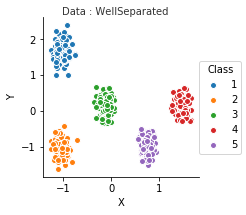

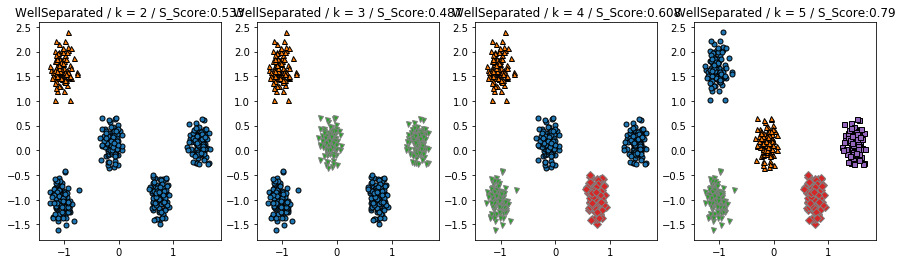

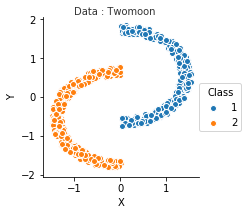

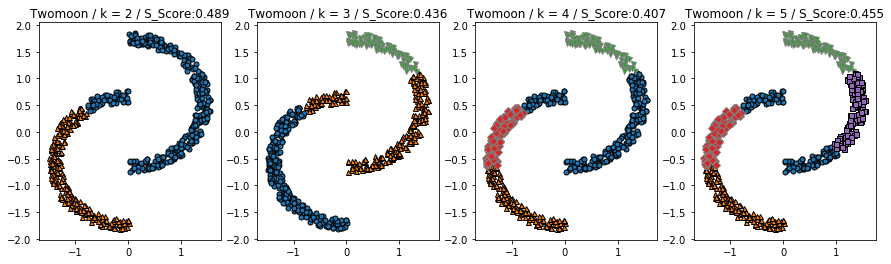

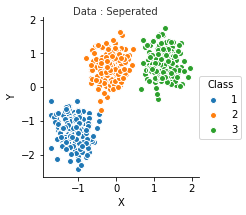

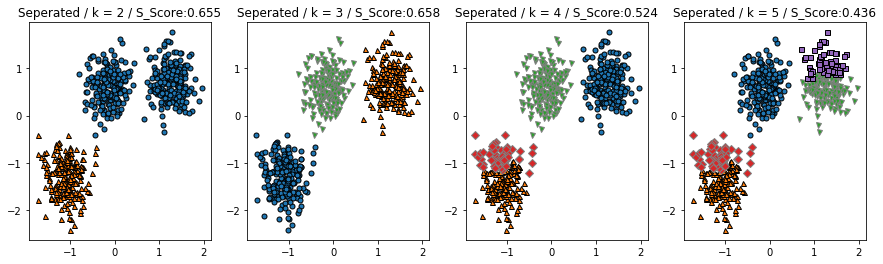

In [100]:
for i in range(0,3):
    Simple_Scatter(Artificial_Dataset[list(Artificial_Dataset.keys())[i]],list(Artificial_Dataset.keys())[i])
    Hclust_Plot(Artificial_Dataset[list(Artificial_Dataset.keys())[i]] ,range(2, 6),list(Artificial_Dataset.keys())[i])

# Clustering 실습2 - Personal Loan
> #### 실습목표 : Personal Loan 데이터를 기반으로 silhouette score기반 최적의 k-Means clustering 생성 후 해석 

### 사용한 PersonalLoan 데이터셋은 다음과 같이 구성되어 있으며 ID와 ZIP code와 Personal Loan은 제외함


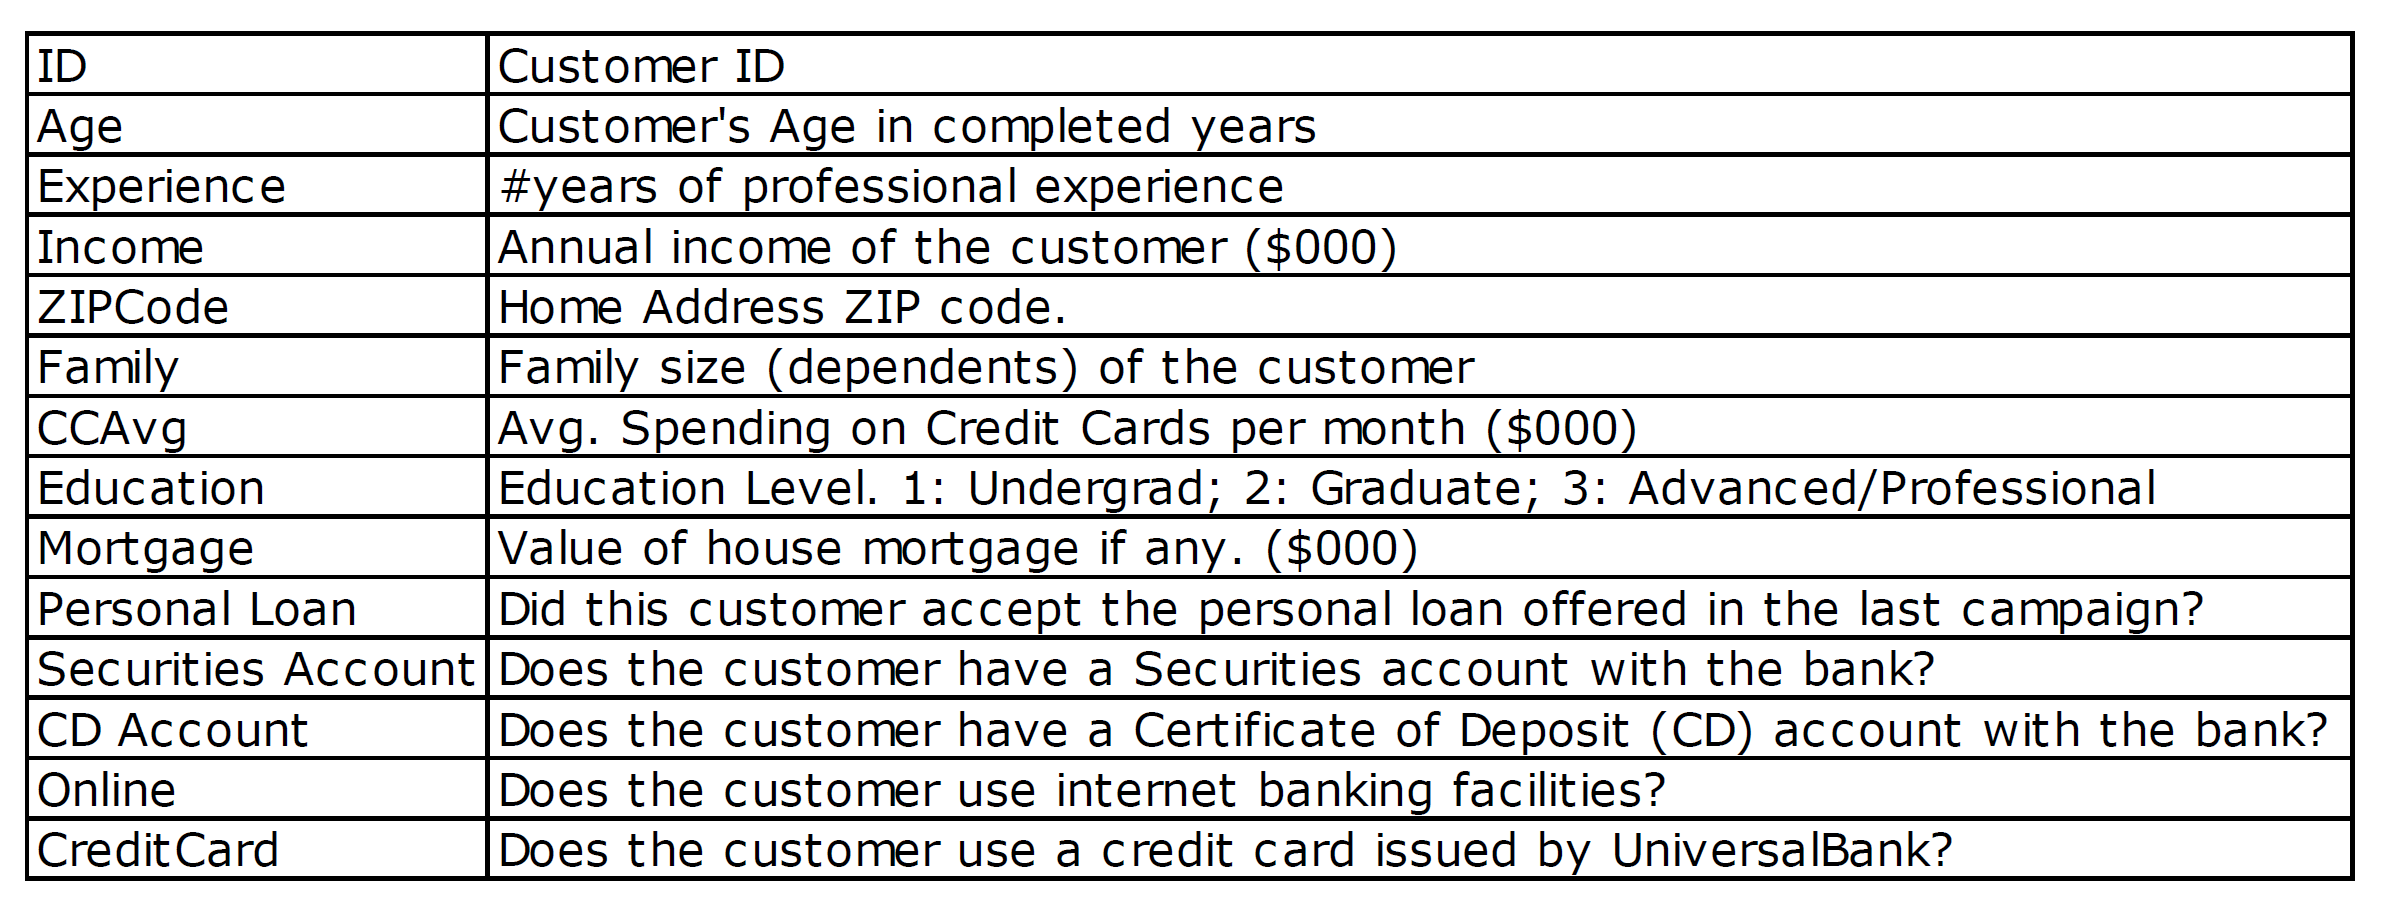

In [107]:
from IPython.display import Image
Image(filename='Ploan_Description.png') 

### 사용할 데이터를 추출 후,  standardization함

### k-Means clustering을 시행
> 1. Hyper-parameter인 k는 2~10까지 생성
> 2. 평가지표는 silhouette score를 사용